<a href="https://colab.research.google.com/github/NicoReit54/ExDDS_WS25/blob/main/ExDDS_WS25_ColabSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Colab Space for Group 3**
## Paper in focus
[3 Lost in Transliteration: Bridging the Script Gap in Neural IR. Andreas Chari, Iadh Ounis, and Sean MacAvaney. (SIGIR 2025). ](https://dl.acm.org/doi/10.1145/3726302.3730226)

[>> Their GitHub Repository](https://github.com/andreaschari/transliterations)

## Collaborators
+ Wesp Simon
+ Nico Reiterer
+ Kerner Simon

**REMARK >> Use the code under Modularized Code for simplicity**

### Few negative points to note in the report
+ No real long-term storage solution of the used data
+ Portability not really given
+ Environment/versions of packages etc not described. Basically just the python version
+ Reproducability is "hard" due to hardware constraints
+ No real discussion on the data itself, why trustworthy/no biases, ... (although its from microsoft from a big publication, so should be fine)
+ Further question on the paper and the mixed configuration: "[...] For our mixed configuration (50), we fine-tuned on an even split of transliterated and native text queries." How did they do the split?
+ in finetune_bgem3.sh we find a typo: "--normlized True"
+ Not  explained why they e.g. use AdamW optimiuer instead of Adam in finetune_mt5
+ Generally some explanations missing. Like which system did they run all of this on? Mac seems not to be supported for some functionality
+ see further remarks in this notebook


# **General**

## **Research Questions they posed** (and that we have to reproduce)


1. How robust are existing neural IR (information retrieval) methods when dealing with transliterated queries?
2. Can the script gap be bridged using "***transliterate-train***"?*
3. Does “transliterate-train” generalise to out-of-domain collections?


*' It’s a training strategy the authors invented, inspired by the existing method called translate-train.

+ **Translate-train**: In multilingual IR, researchers take a big dataset (like MS MARCO in English) and machine-translate queries into other languages (Chinese, Russian, etc.). This creates training data in multiple languages, so models learn to handle different ones.

* **Transliterate-train (new)**: Instead of translating queries into another language, they romanize (transliterate) them into the Latin script


## **Resources**

+ **Preliminary repo for the beginning**:
https://github.com/NicoReit54/ExDDS_WS25

+ **Overleaf Template**:
https://www.overleaf.com/3451124583vmvqbbtszgyv#3afd79

+ **mMARCO**:
https://github.com/unicamp-dl/mMARCO // https://huggingface.co/datasets/unicamp-dl/mmarco#

+ **neuCLIR/1**:
https://neuclir.github.io/#-task-multilingual-retrieval-mlir ??

+ **Uroman Latin Transliterator**:
https://aclanthology.org/P18-4003.pdf *(remark: the software itself is not available anymore but a git repo still)*

+ **Translate Train methodology** (3rd chapter):
https://link.springer.com/chapter/10.1007/978-3-030-99736-6_26#Sec3

+ **BGE-M3 (used as retriever)**:
https://huggingface.co/BAAI/bge-m3/blob/main/README.md

+ **mT5 (used as reranker)**:
https://github.com/google-research/multilingual-t5

+ **PyTerrier platform (similar to PyTorch etc just for IR)**:
https://github.com/terrier-org/pyterrier

+ **ir-measures (IF with several IR evaluation tools)**:
https://ir-measur.es/en/latest/

+ **ir_datasets (package for accessing the datasets)**
https://github.com/allenai/ir_datasets






****
### **Some interesting forum entries/explanations on top**
**Sparse and dense information**
https://www.reddit.com/r/MachineLearning/comments/z76uel/d_difference_between_sparse_and_dense_information/


**Retriever and Reranker**
https://www.pinecone.io/learn/series/rag/rerankers/





****
## **Q & A**

**What is mmarco?**

A version of the MS MARCO passage dataset (msmarco-passage) with the queries and documents automatically translated into several languages.
See also github:
https://github.com/unicamp-dl/mMARCO

<br/><br/>
**What is MS MARCO?**

Starting with a paper released at NIPS 2016, MS MARCO is a collection of datasets focused on deep learning in search.

The first dataset was a question answering dataset featuring 100,000 real Bing questions and a human generated answer. Since then they released a 1,000,000 question dataset, a natural language generation dataset, a passage ranking dataset, keyphrase extraction dataset, crawling dataset, and a conversational search.

<br/><br/>
**What is indexing (done before retrieval)?**

Indexing the collection is the foundation of information retrieval in NLP. It transforms raw text into efficient lookup structures—whether sparse (inverted index) or dense (embeddings)—so that queries can be answered quickly, accurately, and at scale.

[v2.1](https://huggingface.co/datasets/microsoft/ms_marco)
+ answers: a list of string features.
+ passages: a dictionary feature containing:
+ is_selected: a int32 feature.
+ passage_text: a string feature.
+ url: a string feature.
+ query: a string feature.
+ query_id: a int32 feature.
+ query_type: a string feature.
+ wellFormedAnswers: a list of string features.

<br/><br/>
**What is a retriever?**

A retriever, which retrieves relevant knowledge pieces from a knowledge base given a context, is an important component in many natural language processing (NLP) tasks. Retrievers have been introduced in knowledge-grounded dialog systems to improve knowledge acquisition. Basically finds quickly a candidate set of potentially relevant documents from a huge collection based on the query.

<br/><br/>
**What is a reranker?**

A reranking model - also known as a cross-encoder - is a type of model that, given a query and document pair, will output a similarity score. We use this score to reorder the documents by relevance to our query.

Search engineers have used rerankers in two-stage retrieval systems for a long time. In these two-stage systems, a first-stage model (an embedding model/retriever) retrieves a set of relevant documents from a larger dataset. Then, a second-stage model (the reranker) is used to rerank those documents retrieved by the first-stage model.

We use two stages because retrieving a small set of documents from a large dataset is much faster than reranking a large set of documents — we'll discuss why this is the case soon — but TL;DR, rerankers are slow, and retrievers are fast.

[Good website for explanation on the above two questions](https://www.pinecone.io/learn/series/rag/rerankers/)

<br/><br/>
**What are PyTerrier, ir-measures and ir_datasets?**

**PyTerrier** is a Python framework for building reproducible IR experiments by chaining components such as retrievers and rerankers into pipelines.

**ir-measures** is a library that provides standardized implementations of evaluation metrics like MRR, Recall, and nDCG to ensure consistency across experiments

**ir_datasets** is a library that offers access to benchmark IR datasets (including queries, documents, ...) with standardized preprocessing and versioning.

Together, these tools form a workflow where ir_datasets basically supplies the data, PyTerrier runs the retrieval pipeline, and ir-measures evaluates the results.

<br/><br/>
**What are the measures used in the paper?**

**MRR@k (Mean Reciprocal Rank)**  
- Measures how quickly the first relevant document appears (within the first *k* retrieved documents)
- Reciprocal of the rank of the first relevant doc, averaged across queries (e.g. first relevant document appeared second >> 1/2 = 0.5)
- Range: 0–1 (higher is better).

**R@k (Recall@k)**  
- Fraction of all relevant documents retrieved within the top *k* results.  
- Shows coverage: did the system find most of the relevant docs?  
- Range: 0–1 (higher is better).

**nDCG@k (Normalized Discounted Cumulative Gain)**  
- Considers multiple relevant documents and their positions in the ranking.  
- Higher relevance and higher rank contribute more.  
- Normalized against the ideal ranking.  
- Range: 0–1 (higher is better).


## **Steps for the first research question**

"In their experiments, they used the Chinese and Russian translations of [mMARCO/v2](https://huggingface.co/datasets/unicamp-dl/mmarco)  and neuCLIR/1.

They focused on **Chinese and Russian** because they represent two completely different cases of languages that can be transliterated. Chinese characters have no
overlap with Latin, and Russian’s Cyrillic script overlaps by a large margin with the Latin script.

Using the **Uroman** transliterator, a tool commonly used to romanize non-Latin scripts, they produced romanized versions of both the ‘dev/small‘ and the ‘train‘ query sets for both languages. Finally, they repeated the process for the ‘trec-2022‘ and ‘trec2023‘ query sets for the respective neuCLIR datasets."

# Code (snippets)

## Import and Mounting

In [8]:
!git clone https://github.com/andreaschari/transliterations.git
!git clone https://github.com/andreaschari/linguistic-transfer.git

fatal: destination path 'transliterations' already exists and is not an empty directory.
fatal: destination path 'linguistic-transfer' already exists and is not an empty directory.


In [9]:
# pip install as described in their Github
!pip install pyterrier pyterrier_dr[bgem3] pyterrier_pisa pyterrier_t5 uroman ir_datasets FlagEmbedding

In [6]:
!python --version
# 3.12.12 used here as of EoY 2025

Python 3.12.12


In [7]:
import ir_datasets
import os
import random

random.seed(42)
language = "ru"
dataset_name = "mini"
dev = True
sample_size = 100

# to make the small dataset compatible with the experiment,
# mimics at least partially the API of ir_datasets
class MiniDataset:
    def __init__(self, docs, queries, qrels):
        self._docs = docs
        self._queries = queries
        self._qrels = qrels

        # Build qid >> [positive pids]
        self._pos = {}
        for qr in qrels:
            if qr.relevance > 0:
                self._pos.setdefault(qr.query_id, []).append(qr.doc_id)

        # Build negative pool
        self._all_pids = list(docs.keys())

    def docs_iter(self):
        return iter(self._docs.values())

    def queries_iter(self):
        return iter(self._queries)

    def qrels_iter(self):
        return iter(self._qrels)

    def docs_store(self):
        return self._docs

    def docpairs_iter(self):
        # yields (qid, pos_pid, neg_pid)
        for qid, pos_list in self._pos.items():
            for pos_pid in pos_list:
                # sample a random negative
                neg_pid = random.choice(self._all_pids)
                while neg_pid == pos_pid:
                    neg_pid = random.choice(self._all_pids)
                yield qid, pos_pid, neg_pid

print("Loading the dataset")
dataset = ir_datasets.load(f"mmarco/v2/{language}/dev"
                           if dev else f"mmarco/v2/{language}/train")
print("Done Loading the dataset, now onto creating necessary objects.")

# sample queries
all_queries = list(dataset.queries_iter())
queries = random.sample(all_queries, sample_size)

query_ids = {q.query_id for q in queries}

# filter qrels accordingly
qrels = [qr for qr in dataset.qrels_iter() if qr.query_id in query_ids]

# collect the docs referenced in qrels and then ...
doc_ids = {qr.doc_id for qr in qrels}

# ... load only needed docs (lets see if we even need them, but they are
# available via one of the three iter methods)
docs = {d.doc_id: d for d in dataset.docs_iter() if d.doc_id in doc_ids}

# Create the object
mini = MiniDataset(docs, queries, qrels)

# Save native queries
native_query_path = f"/content/{dataset_name}_{language}_queries_native.tsv"
with open(native_query_path, "w", encoding="utf8") as f:
    for q in mini.queries_iter():
        f.write(f"{q.query_id}\t{q.text}\n")

print("Saved native queries to:", native_query_path)

# Save native docs
native_docs_path = f"/content/{dataset_name}_{language}_docs_native.tsv"
with open(native_docs_path, "w", encoding="utf8") as f:
    for d in mini.docs_iter():
        f.write(f"{d.doc_id}\t{d.text}\n")

print("Saved native docs to:", native_docs_path)




Loading the dataset
Done Loading the dataset, now onto creating necessary objects.


[INFO] If you have a local copy of https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/queries/dev/russian_queries.dev.tsv, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/b1fe46eea62d4c5c3776c1bc7c38034e
[INFO] [starting] https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/queries/dev/russian_queries.dev.tsv
[INFO] [finished] https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/queries/dev/russian_queries.dev.tsv: [00:00] [7.85MB] [9.77MB/s]
[INFO] [starting] https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/qrels.dev.tsv
[INFO] [finished] https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/qrels.dev.tsv: [00:00] [1.20MB] [1.63MB/s]
[INFO] If you have a local copy of https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/collections/russian_collection.tsv, you can symlink it here to avoid downloading it again: /root/.ir_datasets/

KeyboardInterrupt: 

## Adapted transliterate.py

Added also a transliteration of the docs part of the dataset for the mini version as it is needed for the finetuning (cannot ofc use the full docs from mmarco there as it would be hardcoded there)


In [ ]:
import uroman as ur
import ir_datasets
from tqdm import tqdm
import argparse

# set the data set to the mini dataset
dataset = mini

# Set up the output path and the dataset
output_path = "/content"
dataset_name = dataset_name
lang = language

# Load the uroman romanizer
romanizer = ur.Uroman()

print(f"Loaded dataset: {dataset_name}")

# change dataset name from / to _
dataset_name = dataset_name.replace("/", "_")


query_filepath = f"{output_path}/{dataset_name}_{language}_query_uroman.tsv"
for query in tqdm(dataset.queries_iter(), desc="Romanizing queries"):
    query_id = query.query_id
    if "neuclir" in dataset_name:
        ht_title = query.ht_title
        mt_title = query.mt_title
        ht_description = query.ht_description

        romanized_ht_title = romanizer.romanize_string(ht_title, lang=lang)
        romanized_mt_title = romanizer.romanize_string(mt_title, lang=lang)
        romanized_ht_desc = romanizer.romanize_string(ht_description, lang=lang)

        # save all queries to the same file in TSV format
        with open(query_filepath, "a") as f:
            f.write(f"{query_id}\t{romanized_ht_title}\t{romanized_mt_title}\t{romanized_ht_desc}\n")
    else:
        query_text = query.text
        # tokenize the query text >> not done on purpose as they say in the paper
        # tokenized_query = tokenizer(query_text)
        # romanized_query = " ".join(tokenized_query)
        # romanized_query = romanizer.romanize_string(" ".join(tokenized_query), lang=lang)
        romanized_query = romanizer.romanize_string(query_text, lang=lang)

        # save all queries to the same file in TSV format
        with open(query_filepath, "a") as f:
            f.write(f"{query_id}\t{romanized_query}\n")

        with open(query_filepath, "a", encoding="utf8") as f:
            f.write(line)


# save a transilterated docs version as well
collection_filepath = f"{output_path}/{dataset_name}_{language}_docs_uroman.tsv"

with open(collection_filepath, "w", encoding="utf8") as f:
    for doc in tqdm(dataset.docs_iter(), desc="Romanizing docs"):
        pid = doc.doc_id
        text = doc.text
        romanized = romanizer.romanize_string(text, lang=lang)
        f.write(f"{pid}\t{romanized}\n")

print("Saved:", collection_filepath)

print("Done")

In [ ]:
# FYI: you have to change the output_path variable in the transliterate.py to content/transliterations/
#TRANSLITERATIONS_DIR = "/content/"

# Just ran with the small dev set because why not and it worked on this here
# https://ir-datasets.com/mmarco.html#mmarco/v2/ru
#!python /content/transliterations/transliterate.py --lang ru --dataset mmarco/v2/ru/dev/small



## **Fine-tuning the Models**
Using the scripts:
+ finetune_bgem3.sh
+ finetune_mt5.py

**REMARK**

Tried to do the preprocessing for the finetuning as well but ran out of memory on this VM. In any way there are already the fine-tuned models available **at the end of this chapter (the links to the respective fine-tuned models)**

Else the finetuning was possible with a vastly reduced dataset (e.g. 100 instances)

+ Further question on the paper and the mixed configuration:
"[...] For our mixed configuration (50), we fine-tuned on an
even split of transliterated and native text queries."
+ How did they do the split??
+ in finetune_bgem3.sh we find a typo: "--normlized True"
+ Not really explained why they e.g. use AdamW optimizer instead of Adam in finetune_mt5
+ Generally some explanations missing. Like which system did they run all of this on? Mac seems not to be supported for some functionality
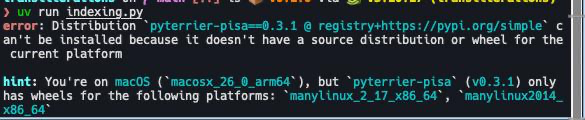


### Preprocessing & Finetuning

In [ ]:
# Link to FlagEmbedding finetuning (which is bgem3)
# https://github.com/FlagOpen/FlagEmbedding/tree/master/examples

# in finetune_bgem3.sh we find a typo?
# --normlized True \

For the JSONL file generation we need to use their preprocssing from another repo of them (IF we wanted to do it ourselves)
https://github.com/andreaschari/linguistic-transfer.git

### Adapted finetune_preprocessing.py

**Changes done to it:**
+ Reduced number of sampling rounds to simply 3, adapted for size of reduced minidataset
+ Bit of rearranging of filepath names and such just to make it compatible with the way I defined the variables above. No logic change
+ Had to stop using the negatives from the full data set as there is simply not enough RAM here to handle that (we could ofc preprocess the data outside, but that would still need some downloading and the prepping etc...)
+ Hence I decided to simply draw randomly from the existing data set which should be good enough to provide any negative response to the query. Might not be the best possibility, but it still ensures the process gets a non-positive passage that doesnt properly answer the query!

In [ ]:
# save_msmarco_queries_ir_datasets.py
training_queries_filepath = f"/content/{dataset_name}.train.queries.tsv"

#ds = ir_datasets.load("mmarco/v2/ru/dev/small")
ds = mini
with open(training_queries_filepath, "w", encoding="utf8") as fout:
    for q in ds.queries_iter():
        # q.query_id and q.text
        fout.write(f"{q.query_id}\t{q.text}\n")

print("Saved:", training_queries_filepath)

# finetune_preprocessing.py
# Preprocesses msmarco data to train BGE-M3 model
import random
import json, gzip, pickle
import tqdm
import math
from os.path import exists, join, basename
from sentence_transformers import util


# Sampling code based on ColBERT-XM codebase in https://github.com/ant-louis/xm-retrievers
def download_if_not_exists(data_filepath, file_url: str):
    save_path = join(data_filepath, basename(file_url))
    if not exists(save_path):
        util.http_get(file_url, save_path)
    return save_path

# PATHS
# change these paths to the appropriate paths on your system
# INPUT
# path to the collection file (the initally loaded dataset but not queries, DOCUMENTS!)
collection_filepath = f"/content/{dataset_name}_docs_uroman.tsv"
# path to the training queries
training_queries_filepath = training_queries_filepath
data_filepath = "/content/" # path to save any downloaded data

# Load training queries
training_queries = {}
with open(training_queries_filepath, 'r') as fIn:
    for line in fIn:
        qid, query = line.strip().split('\t')
        training_queries[qid] = query
print(f"#> Loaded training queries: {len(training_queries)}")

# adapt the sampling rounds to the training queries datasize
NEGS_PER_QUERY=1
TOTAL_STEPS=20000 # instead of originally 200000
BATCH_SIZE=8
NUM_SAMPLING_ROUNDS= 3 # instead of math.ceil((TOTAL_STEPS * BATCH_SIZE) / 502939)
examples =  len(training_queries) * NUM_SAMPLING_ROUNDS
print(f"#> Number of sampling rounds: {NUM_SAMPLING_ROUNDS}")
CE_MARGIN=3.0

# OUTPUT
# path to save the training tuples
training_tuples_filepath = f'/content/triples.mmarco.v2.cafr.train.HN.{NEGS_PER_QUERY+1}way.{examples/1e6:.1f}M.jsonl'

# Load collection
collection = {}
with open(collection_filepath, 'r') as fIn:
    for line in fIn:
        pid, passage = line.strip().split('\t')
        collection[pid] = passage
print(f"#> Loaded collection: {len(collection)}")

print("#> Sampling training triples (random negatives)...")

all_pids = list(collection.keys())
num_training_examples = 0
pos_map = {}

for qr in mini.qrels_iter():
    if qr.relevance > 0:  # positive relevance
        pos_map.setdefault(qr.query_id, []).append(qr.doc_id)

with open(training_tuples_filepath, 'w') as fOut:
    for qid, query in training_queries.items():

        # as a guard as our dataset is smol and might not have the postive one in here
        if qid not in pos_map:
          continue

        # get positive pids from our mini dataset
        pos_pid = random.choice(pos_map[qid])

        # sample one random negative
        neg_pid = random.choice(all_pids)
        while neg_pid == pos_pid:
            neg_pid = random.choice(all_pids)

        sample = {
            "query": query,
            "pos": [collection[pos_pid]],
            "neg": [collection[neg_pid]]
        }

        fOut.write(json.dumps(sample, ensure_ascii=False) + '\n')
        num_training_examples += 1

print(f"#> Number of training examples created: {num_training_examples}")
print(f"#> Training triples saved to {training_tuples_filepath}")

In [ ]:
#!python /content/linguistic-transfer/finetune_preprocessing.py


In [ ]:
# Okay the finetune preprocessing (finetune_preprocessing.py) itself breaks at
# with gzip.open(ce_scores_file, 'rb') as fIn:
#    ce_scores = pickle.load(fIn)
# because it simply uses too much memory.
# When a process in Colab uses more RAM than the VM provides, the Linux kernel’s out‑of‑memory (OOM) killer will terminate processes to free memory

# Will go with the already preprocessed JSONL file they provide in huggingface!

In [ ]:
'''
from huggingface_hub import hf_hub_download

file_name = "triples.ru_zh.FINAL.train.judged.HN.2way.2.0M.jsonl"

file_path = hf_hub_download(
    repo_id="andreaschari/transliterations",
    filename=f"paper_artifacts/training_triples/{file_name}",
    repo_type="dataset"  # important: it's a dataset, not a model (that's why it did not work in the beginning: you added "dataset" to the path)
)

print("File downloaded to:", file_path)

# Now add the printed path to the finetune_bgem3.sh script and run it
'''

### Adapted Finetuning bge-m3
In the cell below the next is the adapted one for running with the small dataset directly in the cell. Do not need to adapt the bash script. But make sure to run this with a GPU instance on colab (or change the variables passed as they required a gpu)

In [ ]:
!bash -c 'torchrun --nproc_per_node 1 \
-m FlagEmbedding.finetune.embedder.encoder_only.m3 \
--output_dir /content/bge-m3-tAR_MMARCO \
--model_name_or_path BAAI/bge-m3 \
--train_data /content/triples.mmarco.v2.cafr.train.HN.2way.0.0M.jsonl \
--learning_rate 1e-5 \
--fp16 \
--num_train_epochs 1 \
--per_device_train_batch_size 8 \
--dataloader_drop_last True \
--temperature 0.02 \
--query_max_len 64 \
--passage_max_len 256 \
--train_group_size 2 \
--negatives_cross_device \
--logging_steps 10 \
--save_steps 50000 \
--query_instruction_for_retrieval ""'
#--normalized True \


Runtime on dev set is quite crazy but I guess thats to be expected when finetuning a probably huge model. With current GPU configuration it seems that it will take appr. 46,2962hrs to process which Google Colab will probably not tolarate

Probably also a good remark for the report:
Performance is not given anywhere. Also not which type of a machine/configuration they have run everything on (probably not Mac as its not supported lol).

**REMARK:** Runtime around 4 min with a mini dataset (with 100 instances)

### Adapted Finetuning mt5


In [ ]:

import argparse
import ir_datasets
import pandas as pd
import torch
import wandb
import logging

from pyterrier_t5 import mT5ReRanker
from transformers import MT5ForConditionalGeneration, T5Tokenizer
from torch.optim import AdamW
from tqdm import tqdm

_logger = ir_datasets.log.easy()
torch.cuda.empty_cache()
torch.manual_seed(0)
# --training_dataset=mmarco/v2/ru/dev/small

# Parse command-line arguments
# SETUP
BATCH_SIZE = 4
MAX_EPOCHS = 1
#LEARNING_RATE = 5e-12
LEARNING_RATE = 5e-6 # too small learning rate
MODEL_SAVE_PATH = "/content/mt5-tAR_MMARCO"
QUERIES_PATH = query_filepath
dataset = mini
OUTPUTS = ['yes', 'no']


def iter_train_samples():
  docs = dataset.docs_store()
  # Load translated queries
  translated_queries_df = pd.read_csv(f'{QUERIES_PATH}', sep='\t', names=['qid', 'query'], on_bad_lines="skip")
  queries = {str(query['qid']) : query['query'] for _, query in translated_queries_df.iterrows()}
  while True:
    for qid, dida, didb in dataset.docpairs_iter():
      if qid in queries:
        yield 'Query: ' + queries[qid] + ' Document: ' + docs.get(dida).text + ' Relevant:', OUTPUTS[0]
        yield 'Query: ' + queries[qid] + ' Document: ' + docs.get(didb).text + ' Relevant:', OUTPUTS[1]

train_iter = iter_train_samples()

model = MT5ForConditionalGeneration.from_pretrained("unicamp-dl/mt5-base-mmarco-v2").cuda()
tokenizer = T5Tokenizer.from_pretrained("unicamp-dl/mt5-base-mmarco-v2")
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

reranker = mT5ReRanker(verbose=False, batch_size=BATCH_SIZE)
reranker.REL = tokenizer.encode(OUTPUTS[0])[0]
reranker.NREL = tokenizer.encode(OUTPUTS[1])[0]

# Initialize wandb
wandb.init(project="mt5-training", config={
  "batch_size": BATCH_SIZE,
  "max_epochs": MAX_EPOCHS,
  "learning_rate": LEARNING_RATE,
  "model": "google/mt5-base"
})

epoch = 0
model.train()

_logger.info("Starting training")
_logger.info(f"Batch size: {BATCH_SIZE}")
_logger.info(f"Max epochs: {MAX_EPOCHS}")

while epoch < MAX_EPOCHS:
    total_loss = 0
    count = 0

    # instead of the mmarco based hardcoded number in the for loop
    # for _ in tqdm((range(497188 // BATCH_SIZE), desc=f"Epoch {epoch}"):
    num_pairs = sum(1 for _ in dataset.docpairs_iter())
    steps_per_epoch = num_pairs // BATCH_SIZE
    for _ in tqdm(range(steps_per_epoch), desc=f"Epoch {epoch}"):
      inp, out = [], []
      for _ in range(BATCH_SIZE):
        inp_, out_ = next(train_iter)
        inp.append(inp_)
        out.append(out_)
      inp_ids = tokenizer(inp, return_tensors='pt', padding=True).input_ids.cuda()
      out_ids = tokenizer(out, return_tensors='pt', padding=True).input_ids.cuda()
      loss = model(input_ids=inp_ids, labels=out_ids).loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total_loss += loss.item()
      count += 1

      # Log loss to wandb
      wandb.log({"loss": total_loss / count})
    _logger.info(f'epoch {epoch} loss {total_loss / count}')
     # save the model
    model.save_pretrained(f'{MODEL_SAVE_PATH}/epoch-{epoch}')
    _logger.info("Saved model to disk")
    epoch += 1
# Log final checkpoint to wandb
wandb.save(f'{MODEL_SAVE_PATH}/epoch-final-{epoch}')
wandb.finish()
_logger.info("Finished training")


### Finetuning bge-m3

In [ ]:
# Following what needs to be added in the finetune_bgme3.sh script as its not up to date for this version of Python
# Based on https://github.com/FlagOpen/FlagEmbedding/tree/master/examples/finetune/embedder#2-bge-m3

'''
torchrun --nproc_per_node 1 \
-m FlagEmbedding.finetune.embedder.encoder_only.m3 \
--output_dir /content/bge-m3-tAR_MMARCO \
--model_name_or_path BAAI/bge-m3 \
--train_data /content/triples.mmarco.v2.cafr.train.HN.2way.0.0M.jsonl \
--learning_rate 1e-5 \
--fp16 \
--num_train_epochs 1 \
--per_device_train_batch_size 8 \
--dataloader_drop_last True \
--normlized True \
--temperature 0.02 \
--query_max_len 64 \
--passage_max_len 256 \
--train_group_size 2 \
--negatives_cross_device \
--logging_steps 10 \
--save_steps 50000 \
--query_instruction_for_retrieval ""
'''
# Remark:
# They probably have a typo with normlized and it should generally be :
# --normalize_embeddings True \

#!bash linguistic-transfer/finetune_bgem3.sh


### Finetuning mt5


In [ ]:
# Use
# 'from torch.optim import AdamW'
#
# instead of
# 'from transformers.optimization import AdamW'
#
# in finetune_mt5.py
# as its been deprecated

# And also do:

# `dataset = ir_datasets.load(args.training_dataset)`
# intest of just
# `dataset = args.training_dataset`
#!python linguistic-transfer/finetune_mt5.py --model_save_path=/content/mt5-tAR_MMARCO --queries_path=/content/mmarco_v2_ru_dev_uroman.tsv --training_dataset=mmarco/v2/ru/train
#!python linguistic-transfer/finetune_mt5.py --model_save_path=/content/mt5-tAR_MMARCO --queries_path=/content/mmarco_v2_ru_dev_uroman.tsv --training_dataset=mmarco/v2/ru/dev/small


In [ ]:
# Remark: Not really explained why they e.g. use AdamW optimiuer instead of Adam in finetune_mt5
# Generally some explanations missing!
# Some explanation on Adam (basically an algorithm for
# the gradient descent such as weight decay regularization)
# See: https://huggingface.co/papers/1711.05101

### **Russian post-trained/fine-tuned**

**Normal**

*BGE*
https://huggingface.co/andreaschari/bge-m3-RU_MMARCO_NATIVE

*mt-5*
https://huggingface.co/andreaschari/mt5-RU_MMARCO_NATIVE


**50-50**

*BGE*
https://huggingface.co/andreaschari/bge-m3-RU_MMARCO_50_MIXED

*mt-5*
https://huggingface.co/andreaschari/mt5-RU_MMARCO_50_MIXED

**Transliterated version**

*BGE*
https://huggingface.co/andreaschari/bge-m3-RU_MMARCO_TRANSLIT

*mt-5*
https://huggingface.co/andreaschari/mt5-RU_MMARCO_TRANSLIT



## **Retrieval**
Done with BGE-M3



### Indexing
Takes for ever on the normal ru data set as well! Appr. 100hrs..

In [ ]:
# Indexing first
#!python transliterations/indexing.py --dataset=mmarco/v2/ru/dev/small --model=bge-m3-RU_MMARCO_TRANSLIT



### Adapted Indexing
Adapted the indexing pipeline to fit the donwsized dataset.
Here we only use their finetuned TRANSLIT model so far. TODO: Do it for all three that are provided by them to get the final table.

In [ ]:
"""use pyterrier_dr to build Flex indices using BGE-M3 encodings"""
import argparse
import pyterrier as pt
from pyterrier_dr import BGEM3, FlexIndex
from transliterations.models import model_paths
import json
from tqdm import tqdm

def iter_jsonl(filename, verbose=True):
    with open(filename, 'rt') as file:
        lines = file.readlines()
        if verbose:
            lines = tqdm(lines, desc="Reading JSONL file")
        for line in lines:
            # assumes that each line contains 'docno', 'text' attributes
            # rename "id" attribute to "docno"
            line = line.replace('"id"', '"docno"')
            # yields a dictionary for each json line
            yield json.loads(line)

dataset = mini
dataset_name = dataset_name
model = "bge-m3-RU_MMARCO_TRANSLIT"
batch_size = 64
max_length = 1024

if model not in model_paths:
    raise ValueError(f"Model {model} not supported")
model_path = model_paths[model]

# create a BGEM3 encoder
factory = BGEM3(batch_size=batch_size, max_length=max_length, model_name=model_path) if model_path else BGEM3(batch_size=batch_size, max_length=max_length)
index = FlexIndex(f"/content/indexing/{dataset_name}_{model}", verbose=True)
index = index.indexer(mode="overwrite")
encoder = factory.doc_encoder()

print(f"Building Flex index for {dataset} dataset...")

#if "neuclir" in dataset:
#    indexing_pipeline = pt.apply.text(lambda x: '{title}\n{text}'.format(**x)) >> encoder >> index
#else:
#    indexing_pipeline = encoder >> index

# indexing_pipeline.index(pt.get_dataset(f"irds:{dataset}").get_corpus_iter())

indexing_pipeline = encoder >> index

def mini_corpus_iter(mini):
    for doc in mini.docs_iter():
        yield {
            "docno": doc.doc_id,
            "text": doc.text
        }

indexing_pipeline.index(mini_corpus_iter(mini))
print("Done")


### Running the Retrieval Experiments

**Remark**

We have to set:
+ `TRANSLITERATIONS_DIR` (path to transliterated queries)
+ `RETRIEVAL_DIR` (path of results to be saved in)

In [ ]:
# TODO: Add Index Path once available
#!python transliterations_experiments.py --lang=ru --index <index path> --model=bge-m3-RU_MMARCO_TRANSLIT --dataset=mmarco/v2/ru/dev/small --evaluate


### Adapted - Running the Retrieval Experiments

Basically added/changed it in a way that it takes our mini dataset instead of taking it from the cloud somewhere. Additionally reads in the queries (transliterated and orig) from the produced .tsv files instead of calling it as a method from the stored thing (we do not have this defined in the mini class (so far at least).

In [ ]:
import argparse
import pyterrier as pt
import pandas as pd
import os
import logging
from pyterrier_dr import BGEM3, FlexIndex
from ir_measures import R, MRR, nDCG

# load model paths
from transliterations.models import model_paths

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

lang = language
index_path = f"/content/indexing/{dataset_name}_{model}" # todo: expand properly
first_stage_model = "bge-m3-RU_MMARCO_TRANSLIT" # first stage retrieval model
dataset_name = dataset_name
evaluate = True                                 # whether to evaluate the results

TRANSLITERATIONS_DIR = "/content/transliterations_output" # Change this to your transliterations directory
RETRIEVAL_DIR = "/content/retrieval_results"              # Change this to your retrieval results directory

# Check if the index directory exists
if not os.path.isdir(index_path):
    raise FileNotFoundError(f"The index: {index_path} does not exist")

if first_stage_model not in model_paths:
    raise ValueError(f"Model {first_stage_model} not supported")
model_name = model_paths[first_stage_model]

dataset_name_storage = dataset_name.replace("/", "_")

# Load Queries
'''
if "neuclir" in dataset_name:
    dataset = pt.get_dataset(f"irds:{dataset_name}")
    queries_orig = dataset.get_topics(tokenise_query=False)
    # only use ht_title and mt_title
    queries_orig = queries_orig[["qid", "ht_title"]]
    queries_orig = queries_orig.rename(columns={"ht_title": "query"})
    # print no. of queries
    logging.info(f"Loaded {len(queries_orig)} queries for {dataset_name} (HT)")

    # pre-process transliterated queries (assumes they are already tokenized before romanisation)
    queries_translit = pd.read_csv(f"{TRANSLITERATIONS_DIR}/{dataset_name_storage}_uroman.tsv", sep="\t", header=None, names=["qid", "ht_title", "mt_title", "ht_description"])
    queries_translit["qid"] = queries_translit["qid"].astype(str)
    queries_translit["ht_title"] = queries_translit["ht_title"].astype(str)
    queries_translit["mt_title"] = queries_translit["mt_title"].astype(str)
    queries_translit["ht_description"] = queries_translit["ht_description"].astype(str)
    queries_translit = queries_translit.rename(columns={"ht_title": "query"})
    logging.info(f"Loaded {len(queries_translit)} queries for transliterated {dataset_name} (HT)")
    # Load Metrics
    metrics = [nDCG@20, R@1000]

else:
'''

#dataset = pt.get_dataset(f"irds:{dataset_name}/{lang}/dev/small")
#queries_orig = dataset.get_topics(tokenise_query=False)

dataset = mini
queries_orig = pd.read_csv(
    f"/content/{dataset_name}_{lang}_queries_native.tsv",
    sep="\t",
    names=["qid", "query"],
    dtype=str
)
queries_orig["qid"] = queries_orig["qid"].astype(str)

logging.info(f"Loaded {len(queries_orig)} queries for {dataset_name}/{lang}")

# pre-process transliterated queries
#queries_translit = pd.read_csv(f"{TRANSLITERATIONS_DIR}/mmarco_v2_{lang}_dev_small_uroman.tsv", sep="\t", header=None, names=["qid", "query"])
#queries_translit["query"] = queries_translit["query"].astype(str)
#queries_translit["qid"] = queries_translit["qid"].astype(str)

queries_translit = pd.read_csv(
    f"/content/{dataset_name}_{lang}_query_uroman.tsv",
    sep="\t",
    names=["qid", "query"],
    dtype=str
)
queries_translit["qid"] = queries_translit["qid"].astype(str)

logging.info(f"Loaded {len(queries_translit)} queries for transliterated {dataset_name}/{lang}")

# Load Metrics
metrics = [MRR@10, R@1000]

factory = BGEM3(batch_size=32, max_length=1024, model_name=model_name) if model_name else BGEM3(batch_size=32, max_length=1024)
encoder = factory.query_encoder()
# Load Pisa Index
idx = FlexIndex(index_path)
logging.info(f"Loaded index {index_path}")
# Retrieval Pipeline
pipeline = encoder >> idx.np_retriever()

# create a directory for retrieval results if they do not exist
os.makedirs(f"{RETRIEVAL_DIR}/{first_stage_model}", exist_ok=True)

# dataset_name = dataset_name.replace("/", "")
## Run Retrieval for Native and Transliterated Queries
res_orig_path = f"{RETRIEVAL_DIR}/{first_stage_model}/{first_stage_model}_{dataset_name_storage}_{lang}.res.gz"
res_trans_path = f"{RETRIEVAL_DIR}/{first_stage_model}/{first_stage_model}_{dataset_name_storage}_{lang}_trans_uro.res.gz"

if os.path.isfile(res_orig_path):
    logging.info(f"Results for {first_stage_model} retrieval for {lang} already exists")
    res_orig = pt.io.read_results(res_orig_path)
    res_orig = res_orig.merge(queries_orig, on="qid")
    logging.info(f"Loaded results from disk: {res_orig_path}")
else:
    logging.info(f"Running {first_stage_model} retrieval for {lang} queries")
    res_orig = pipeline(queries_orig)
    pt.io.write_results(res_orig, res_orig_path)
    logging.info(f"Saved results to disk: {res_orig_path}")

if os.path.isfile(res_trans_path):
    logging.info(f"Results for {first_stage_model} retrieval for transliterated {lang} already exists")
    res_trans = pt.io.read_results(res_trans_path)
    res_trans = res_trans.merge(queries_translit, on="qid")
    logging.info(f"Loaded results from disk: {res_trans_path}")
else:
    logging.info(f"Running {first_stage_model} retrieval for transliterated {lang} queries")
    res_trans = pipeline(queries_translit)
    pt.io.write_results(res_trans, res_trans_path)
    logging.info(f"Saved results to disk: {res_trans_path}")

qrels = []
for qr in mini.qrels_iter():
    qrels.append({
        "qid": qr.query_id,
        "docno": qr.doc_id,
        "label": qr.relevance
    })
qrels = pd.DataFrame(qrels)
qrels["qid"] = qrels["qid"].astype(str)

if evaluate:
    logging.info(f"Evaluating results between native and romanised script using {first_stage_model}")
    experiment = pt.Experiment(
        [res_orig, res_trans],
        queries_orig,
        qrels,
        metrics,
        names=[f"{lang}", f"{lang} transliterated"],
        baseline=0
    )
    print(experiment)
logging.info("Done")


## **Reranking**
Done with mT5

**Remark**

We have to set:
+ `TRANSLITERATIONS_DIR` (path to transliterated queries)
+ `RETRIEVAL_DIR` (path of results to be saved in)

In [ ]:
'''
from FlagEmbedding import BGEM3FlagModel
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

bge_model_name = "andreaschari/bge-m3-RU_MMARCO_NATIVE"
mt5_model_name = "andreaschari/mt5-RU_MMARCO_NATIVE"

# Load BGE model
print(f"Loading BGE model: {bge_model_name}")
bge_model = BGEM3FlagModel(bge_model_name)
print("BGE model loaded successfully.")

# Load mT5 model
print(f"Loading mT5 model: {mt5_model_name}")
mt5_model = AutoModelForSeq2SeqLM.from_pretrained(mt5_model_name)
print("mT5 model loaded successfully.")
'''

In [ ]:
# Todo: add path to index and other params
#!python transliterations_rerank.py --lang=ru --index <index path> --first_stage_model <BGE-M3 model>  --rerank_model >mT5 model> --dataset=mmarco/v2/ru/dev/small --evaluate


## Adapted Reranking
Basically same changes as in Retrieval part

In [ ]:
import argparse
import pyterrier as pt
import pandas as pd
import os
import logging
from pyterrier_t5 import mT5ReRanker
from ir_measures import R, MRR, nDCG
from transliterations.models import t5_model_paths
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

lang = language
first_stage_model = "bge-m3-RU_MMARCO_TRANSLIT" # first stage retrieval model (same as in RERANK #TODO: Use finetuned potentially)
dataset_name = dataset_name
rerank_model = "mt5_ru_translit" # taken from transliterations/models.py
evaluate = True

TRANSLITERATION_DIR = "/content/" # change this to the directory where the transliterations are stored
RETRIEVAL_RESULTS_DIR = "/content/retrieval_results" # change this to the directory where the retrieval results are stored

if rerank_model in t5_model_paths:
    model_path = t5_model_paths[rerank_model]
    reranker = mT5ReRanker(model=model_path, verbose=True) if model_path else mT5ReRanker(verbose=True)
else:
    raise ValueError(f"Invalid reranking model {rerank_model}")

print(f"Using {rerank_model} for re-ranking")
dataset_name_storage = dataset_name.replace("/", "_")

# Load Queries
'''
if "neuclir" in dataset_name:
    dataset = pt.get_dataset(f"irds:{dataset_name}")
    queries_orig = dataset.get_topics(tokenise_query=False)
    # only use ht_title and mt_title
    queries_orig = queries_orig[["qid", "ht_title", "mt_title"]]
    # rename ht_title to query
    queries_orig = queries_orig.rename(columns={"ht_title": "query"})
    # print no. of queries
    logging.info(f"Loaded {len(queries_orig)} queries for {dataset_name} (HT)")
    # pre-process transliterated queries
    queries = pd.read_csv(f"{TRANSLITERATION_DIR}/{dataset_name_storage}_uroman.tsv", sep="\t", header=None, names=["qid", "ht_title", "mt_title", "ht_description"])
    queries["qid"] = queries["qid"].astype(str)
    queries["ht_title"] = queries["ht_title"].astype(str)
    # rename ht_title to query
    queries = queries.rename(columns={"ht_title": "query"})
    logging.info(f"Loaded {len(queries)} queries for transliterated {dataset_name} (HT)")

    # Load Metrics
    metrics = [nDCG@20, R@1000]
else:
'''

#dataset = pt.get_dataset(f"irds:{dataset_name}/{lang}/dev/small")
#queries_orig = dataset.get_topics(tokenise_query=False)

dataset = mini
queries_orig = pd.read_csv(
    f"/content/{dataset_name}.train.queries.tsv",
    sep="\t",
    names=["qid", "query"],
    dtype=str
)
queries_orig["qid"] = queries_orig["qid"].astype(str)


# pre-process transliterated queries
#queries = pd.read_csv(f"{TRANSLITERATION_DIR}/mmarco_v2_{lang}_dev_small_uroman.tsv", sep="\t", header=None, names=["qid", "query"])
#queries["query"] = queries["query"].astype(str)
#queries["qid"] = queries["qid"].astype(str)

queries = pd.read_csv(
    f"/content/{dataset_name}_query_uroman.tsv",
    sep="\t",
    names=["qid", "query"],
    dtype=str
)
queries["qid"] = queries["qid"].astype(str)

logging.info(f"Loaded {len(queries)} queries for {lang}")

# Load Metrics
metrics = [MRR@10, R@1000]

# Load first stage retrieval results (assumes they exist)
res_first_orig_path = f"{RETRIEVAL_RESULTS_DIR}/{first_stage_model}/{first_stage_model}_{dataset_name_storage}_{lang}.res.gz"
res_first_trans_path = f"{RETRIEVAL_RESULTS_DIR}/{first_stage_model}/{first_stage_model}_{dataset_name_storage}_{lang}_trans_uro.res.gz"

if os.path.isfile(res_first_orig_path):
    res_first_orig = pt.io.read_results(res_first_orig_path)

    res_first_orig = res_first_orig.merge(queries_orig, on="qid")
    logging.info(f"Loaded results for {first_stage_model} retrieval for original {lang} from {res_first_orig_path}")
else:
    raise FileNotFoundError(f"First stage retrieval results for {first_stage_model} for {lang} do not exist in {res_first_orig_path}")

if os.path.isfile(res_first_trans_path):
    res_first_trans = pt.io.read_results(res_first_trans_path)

    res_first_trans = res_first_trans.merge(queries, on="qid")
    logging.info(f"Loaded results for {first_stage_model} retrieval for transliterated {lang} from {res_first_trans_path}")
else:
    raise FileNotFoundError(f"First stage retrieval results for {first_stage_model} for transliterated {lang} do not exist")

#pipeline = pt.text.get_text(dataset, "text") >> reranker
doc_lookup = {
    str(doc.doc_id): doc.text
    for doc in mini.docs_iter()
}
res_first_orig["text"] = res_first_orig["docno"].map(doc_lookup)
res_first_trans["text"] = res_first_trans["docno"].map(doc_lookup)

pipeline = reranker

# create results folder if it does not exist
os.makedirs(f"{RETRIEVAL_RESULTS_DIR}/{rerank_model}", exist_ok=True)

res_orig_path = f"{RETRIEVAL_RESULTS_DIR}/{rerank_model}/{rerank_model}_{first_stage_model}_{dataset_name_storage}_{lang}.res.gz"
res_trans_path = f"{RETRIEVAL_RESULTS_DIR}/{rerank_model}/{rerank_model}_{first_stage_model}_{dataset_name_storage}_{lang}_trans_uro.res.gz"

if os.path.isfile(res_orig_path):
    res = pt.io.read_results(res_orig_path)
    # res = res.merge(queries_orig, on="qid")
    logging.info(f"Loaded results for {rerank_model} retrieval for original {lang} from {res_orig_path}")
else:
    logging.info(f"Re-ranking {first_stage_model} results for {lang}")
    res = pipeline(res_first_orig)
    pt.io.write_results(res, res_orig_path)
    logging.info(f"Saved re-ranked results to disk: {res_orig_path}")

if os.path.isfile(res_trans_path):
    res2 = pt.io.read_results(res_trans_path)
    # res2 = res2.merge(queries, on="qid")
    logging.info(f"Loaded results for {rerank_model} retrieval for transliterated {lang} from {res_trans_path}")
else:
    logging.info(f"Re-ranking {first_stage_model} results for transliterated {lang}")
    res2 = pipeline(res_first_trans)
    pt.io.write_results(res2, res_trans_path)
    logging.info(f"Saved re-ranked results to disk: {res_trans_path}")

if evaluate:
    # change res1 and res2 for whatever you want to evaluate
    res = pipeline(res_first_orig)
    res2 = pipeline(res_first_trans)

    qrels = []
    for qr in mini.qrels_iter():
        qrels.append({
            "qid": qr.query_id,
            "docno": qr.doc_id,
            "label": qr.relevance
        })
    qrels = pd.DataFrame(qrels)
    qrels["qid"] = qrels["qid"].astype(str)

    logging.info("Evaluating results between variaties")
    experiment = pt.Experiment(
        [res, res2],
        queries_orig,
        qrels,
        metrics,
        names=[f"native {lang}", f" transliterated {lang}"],
        baseline=0,
        correction="b"
    )
    print(experiment)
    logging.info("Done")

# Modularized Code
Everything before was just for exploration and making it work

## Import and Mounting

In [10]:
# Clone the necessary/used repos
!git clone https://github.com/andreaschari/transliterations.git
!git clone https://github.com/andreaschari/linguistic-transfer.git

# pip install as described in their Github / as necessary
!pip install pyterrier pyterrier_dr[bgem3] pyterrier_pisa pyterrier_t5 uroman ir_datasets FlagEmbedding
# Remark: You may have to restart the kernel after this pip install

# 3.12.12 used here as of EoY 2025
!python --version

fatal: destination path 'transliterations' already exists and is not an empty directory.
fatal: destination path 'linguistic-transfer' already exists and is not an empty directory.
Python 3.12.12


In [11]:
!pip freeze > requirements.txt # to put into our repo at some point

In [12]:
import os
import random
import json

import pandas as pd
import ir_datasets
import uroman as ur
import pyterrier as pt

from tqdm import tqdm
from pyterrier_dr import BGEM3, FlexIndex
from pyterrier_t5 import mT5ReRanker
from transliterations.models import model_paths, t5_model_paths
from ir_measures import R, MRR

In [13]:
# to make the small dataset compatible with the experiment,
# mimics at least partially the API of ir_datasets
class MiniDataset:
    def __init__(self, docs, queries, qrels):
        self._docs = docs
        self._queries = queries
        self._qrels = qrels

        # Build qid >> [positive pids]
        self._pos = {}
        for qr in qrels:
            if qr.relevance > 0:
                self._pos.setdefault(qr.query_id, []).append(qr.doc_id)

        # Build negative pool
        self._all_pids = list(docs.keys())

    def docs_iter(self):
        return iter(self._docs.values())

    def queries_iter(self):
        return iter(self._queries)

    def qrels_iter(self):
        return iter(self._qrels)

    def docs_store(self):
        return self._docs

    def docpairs_iter(self):
        # yields (qid, pos_pid, neg_pid)
        for qid, pos_list in self._pos.items():
            for pos_pid in pos_list:
                # sample a random negative
                neg_pid = random.choice(self._all_pids)
                while neg_pid == pos_pid:
                    neg_pid = random.choice(self._all_pids)
                yield qid, pos_pid, neg_pid

def build_mini_dataset(
    dataset_name: str = "mini",
    language: str = "ru",
    sample_size: int = 100,
    dev: bool = True,
    output_dir: str = "/content",
    seed: int = 42):
    """
    Build a MiniDataset by sampling queries, filtering qrels, collecting docs,
    and saving native queries/docs to disk.

    Parameters
    ----------
    language : str
        Language code for the dataset (e.g., "ru").
    sample_size : int
        Number of queries to sample.
    dev : bool
        Whether to load the dev or train split.
    output_dir : str
        Directory where native queries/docs will be saved.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    mini : MiniDataset
        The constructed mini dataset.
    paths : dict
        Paths to saved native queries and docs.
    """

    random.seed(seed)

    # Load dataset
    print("Loading the dataset...")
    dataset = ir_datasets.load(
        f"mmarco/v2/{language}/dev" if dev else f"mmarco/v2/{language}/train"
    )
    print("Dataset loaded.")

    # Sample queries
    all_queries = list(dataset.queries_iter())
    queries = random.sample(all_queries, sample_size)
    query_ids = {q.query_id for q in queries}

    # Filter qrels
    qrels = [qr for qr in dataset.qrels_iter() if qr.query_id in query_ids]

    # Collect docs referenced in qrels
    doc_ids = {qr.doc_id for qr in qrels}
    docs = {d.doc_id: d for d in dataset.docs_iter() if d.doc_id in doc_ids}

    # Build MiniDataset
    mini = MiniDataset(docs, queries, qrels)

    # Prepare output paths
    native_query_path = os.path.join(
        output_dir, f"{dataset_name}_{language}_queries_native.tsv"
    )
    native_docs_path = os.path.join(
        output_dir, f"{dataset_name}_{language}_docs_native.tsv"
    )

    # Save native queries
    with open(native_query_path, "w", encoding="utf8") as f:
        for q in mini.queries_iter():
            f.write(f"{q.query_id}\t{q.text}\n")

    print("Saved native queries to:", native_query_path)

    # Save native docs
    with open(native_docs_path, "w", encoding="utf8") as f:
        for d in mini.docs_iter():
            f.write(f"{d.doc_id}\t{d.text}\n")

    print("Saved native docs to:", native_docs_path)

    return mini, {
        "native_queries": native_query_path,
        "native_docs": native_docs_path
    }



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Transliterate
Also called romanize

In [14]:
def romanize_dataset(
    dataset,
    dataset_name: str,
    lang: str,
    output_path: str = "/content",
    overwrite: bool = False):

  """
  Romanize queries and documents from a dataset using uroman.

  Parameters
  ----------
  dataset : object
      Dataset object with .queries_iter() and .docs_iter().
  dataset_name : str
      Name of the dataset (used for output filenames).
  lang : str
      Language code for uroman romanization.
  output_path : str
      Directory where romanized TSV files will be written.
  overwrite : bool
      If True, overwrite existing output files. Otherwise append for queries
      and create new docs file.
  Returns
  ----------
  dict
      Paths to romanized TSV files.
  """

  print(f"Romanizing dataset: {dataset_name}")

  # Normalize dataset name for filesystem
  dataset_name_clean = dataset_name.replace("/", "_")

  # Prepare output files
  query_filepath = os.path.join(output_path,
                                f"{dataset_name_clean}_{lang}_query_uroman.tsv")
  docs_filepath = os.path.join(output_path,
                                f"{dataset_name_clean}_{lang}_docs_uroman.tsv")

  # Overwrite logic
  if overwrite:
    if os.path.exists(query_filepath):
      os.remove(query_filepath)
    if os.path.exists(docs_filepath):
      os.remove(docs_filepath)

  # Load romanizer
  romanizer = ur.Uroman()

  # Romanize queries
  print("Romanizing queries...")

  for query in tqdm(dataset.queries_iter(), desc="Romanizing queries"):
    qid = query.query_id

    # NeuCLIR-style multi-field queries (not tested yet!)
    if "neuclir" in dataset_name_clean:
      print("Entering not yet tested section")
      ht_title = query.ht_title
      mt_title = query.mt_title
      ht_desc = query.ht_description

      r_ht_title = romanizer.romanize_string(ht_title, lang=lang)
      r_mt_title = romanizer.romanize_string(mt_title, lang=lang)
      r_ht_desc = romanizer.romanize_string(ht_desc, lang=lang)

      line = f"{qid}\t{r_ht_title}\t{r_mt_title}\t{r_ht_desc}\n"

    # Standard single-field queries
    else:
      text = query.text
      r_text = romanizer.romanize_string(text, lang=lang)
      line = f"{qid}\t{r_text}\n"

    with open(query_filepath, "a", encoding="utf8") as f:
      f.write(line)

  print(f"Saved romanized queries to {query_filepath}")

  # Romanize documents
  print("Romanizing documents...")

  with open(docs_filepath, "w", encoding="utf8") as f:
    for doc in tqdm(dataset.docs_iter(), desc="Romanizing docs"):
        pid = doc.doc_id
        text = doc.text
        r_text = romanizer.romanize_string(text, lang=lang)
        f.write(f"{pid}\t{r_text}\n")

  print(f"Saved romanized documents to {docs_filepath}")
  print("Romanization complete.")

  return {
      "queries_file": query_filepath,
      "docs_file": docs_filepath
  }




## Retrieval

### Indexing

In [15]:
def build_flex_index(dataset,
                     dataset_name: str,
                     model: str = "bge-m3-RU_MMARCO_TRANSLIT",
                     batch_size: int = 64,
                     max_length: int = 1024,
                     index_root: str = "/content/indexing") -> str:
    """
    Build a FlexIndex using BGE-M3 encodings for a given dataset.

    Parameters
    ----------
    dataset : object
        Dataset object with a .docs_iter() method yielding documents with
        .doc_id and .text attributes.
    dataset_name : str
        Name of the dataset (used for index path).
    model : str
        Key for model_paths from transliterations.models.
    batch_size : int
        Batch size for BGEM3 encoder.
    max_length : int
        Max sequence length for BGEM3 encoder.
    index_root : str
        Directory where the index will be stored.
    verbose : bool
        Whether to print progress messages.

    Returns
    ---------
    index_path : str
        The path to the stored index
    """

    # Check whether the model is in their given path
    if model not in model_paths:
        raise ValueError(f"Model {model} not supported")

    model_path = model_paths[model]

    # Create the encoder factory
    factory = BGEM3(
        batch_size=batch_size,
        max_length=max_length,
        model_name=model_path
    ) if model_path else BGEM3(batch_size=batch_size, max_length=max_length)

    encoder = factory.doc_encoder()

    # Prepare index path given the root
    index_path = os.path.join(index_root, f"{dataset_name}_{model}")
    print(f"Index will be stored at: {index_path}")

    index = FlexIndex(index_path, verbose=True).indexer(mode="overwrite")

    # Build the pipeline
    indexing_pipeline = encoder >> index

    # Dataset iterator to be used
    def corpus_iter(ds):
        for doc in ds.docs_iter():
            yield {
                "docno": doc.doc_id,
                "text": doc.text
            }

    print(f"Building Flex index for dataset '{dataset_name}' using model '{model}'...")

    # Finally run the indexing
    indexing_pipeline.index(corpus_iter(dataset))

    print("Indexing complete.")

    return index_path

### Running the Retrieval Experiments

In [16]:
def run_first_stage_retrieval(dataset,
                              dataset_name: str,
                              lang: str,
                              model: str = "bge-m3-RU_MMARCO_TRANSLIT",
                              translit_dir: str = "/content/transliterations_output",
                              retrieval_dir: str = "/content/retrieval_results",
                              index_root: str = "/content/indexing",
                              evaluate: bool = True,
                              batch_size: int = 32,
                              max_length: int = 1024,
                              queries_path: str | None = None,
                              translit_queries_path: str | None = None):
    """
    Run first-stage retrieval using a FlexIndex and BGE-M3 query encoder.
    Supports both native and transliterated queries, with optional evaluation.

    Parameters
    ----------
    dataset : object
        Dataset object with .qrels_iter() for evaluation.
    dataset_name : str
        Name of the dataset (used for file paths).
    lang : str
        Language code (used for naming outputs).
    model : str
        Retrieval model key from model_paths.
    translit_dir : str
        Directory containing transliterated query files.
    retrieval_dir : str
        Directory where retrieval results will be stored.
    index_root : str
        Root directory where indices are stored.
    evaluate : bool
        Whether to run evaluation using qrels.
    batch_size : int
        Batch size for BGEM3 query encoder.
    max_length : int
        Max sequence length for BGEM3 query encoder.
    queries_path : str or None
        Path to native queries TSV. If None, defaults to /content/{dataset_name}.train.queries.tsv
    translit_queries_path : str or None
        Path to transliterated queries TSV. If None, defaults to /content/{dataset_name}_query_uroman.tsv
    """

    print("Starting first-stage retrieval pipeline")

    # Set paths
    index_path = os.path.join(index_root, f"{dataset_name}_{model}")
    dataset_name_storage = dataset_name.replace("/", "_")

    if queries_path is None:
        queries_path = f"/content/{dataset_name}_{lang}_queries_native.tsv"

    if translit_queries_path is None:
        translit_queries_path = f"/content/{dataset_name}_{lang}_query_uroman.tsv"

    # Validate index and model
    if not os.path.isdir(index_path):
        raise FileNotFoundError(f"Index not found: {index_path}")

    if model not in model_paths:
        raise ValueError(f"Model {model} not supported")

    model_name = model_paths[model]

    # Load queries
    queries_orig = pd.read_csv(
        queries_path,
        sep="\t",
        names=["qid", "query"],
        dtype=str
    )
    queries_orig["qid"] = queries_orig["qid"].astype(str)
    print(f"Loaded {len(queries_orig)} native queries")

    queries_translit = pd.read_csv(
        translit_queries_path,
        sep="\t",
        names=["qid", "query"],
        dtype=str
    )
    queries_translit["qid"] = queries_translit["qid"].astype(str)
    print(f"Loaded {len(queries_translit)} transliterated queries")

    # Set the metrics
    metrics = [MRR@10, R@1000]

    # Build encoder + index
    factory = BGEM3(
        batch_size=batch_size,
        max_length=max_length,
        model_name=model_name
    ) if model_name else BGEM3(batch_size=batch_size, max_length=max_length)

    encoder = factory.query_encoder()
    idx = FlexIndex(index_path)
    print(f"Loaded index from {index_path}")

    pipeline = encoder >> idx.np_retriever()

    # Prepare output directory
    model_dir = os.path.join(retrieval_dir, model)
    os.makedirs(model_dir, exist_ok=True)

    res_orig_path = os.path.join(
        model_dir, f"{model}_{dataset_name_storage}_{lang}.res.gz"
    )
    res_trans_path = os.path.join(
        model_dir, f"{model}_{dataset_name_storage}_{lang}_trans_uro.res.gz"
    )

    # Run retrieval (native)
    if os.path.isfile(res_orig_path):
        print("Native retrieval results already exist")
        res_orig = pt.io.read_results(res_orig_path)
        res_orig = res_orig.merge(queries_orig, on="qid")
    else:
        print("Running retrieval for native queries")
        res_orig = pipeline(queries_orig)
        pt.io.write_results(res_orig, res_orig_path)
        print(f"Saved native results to {res_orig_path}")

    # Run retrieval (transliterated)
    if os.path.isfile(res_trans_path):
        print("Transliterated retrieval results already exist")
        res_trans = pt.io.read_results(res_trans_path)
        res_trans = res_trans.merge(queries_translit, on="qid")
    else:
        print("Running retrieval for transliterated queries")
        res_trans = pipeline(queries_translit)
        pt.io.write_results(res_trans, res_trans_path)
        print(f"Saved transliterated results to {res_trans_path}")

    # Build the qrels
    qrels = pd.DataFrame([
        {"qid": qr.query_id, "docno": qr.doc_id, "label": qr.relevance}
        for qr in dataset.qrels_iter()
    ])
    qrels["qid"] = qrels["qid"].astype(str)

    # Evaluation if wanted
    if evaluate:
      print(f"Evaluating native vs transliterated queries using {model}")
      experiment = pt.Experiment(
          [res_orig, res_trans],
          queries_orig,
          qrels,
          metrics,
          names=[f"{lang}", f"{lang} transliterated"],
          baseline=0
      )
      print(experiment)

      # Create the results directory if not done yet
      results_dir = "/content/results"
      os.makedirs(results_dir, exist_ok=True)

      # Save the experiment as CSV
      exp_path = os.path.join(results_dir,
                              f"experiment_{dataset_name}_{lang}.csv")

      experiment.to_csv(exp_path, sep="\t", index=False)
      print(f"Saved experiment results to: {exp_path}")

    print("Retrieval pipeline complete")
    return {
        "native_results": res_orig_path,
        "translit_results": res_trans_path,
        "index_path": index_path
    }


## Reranking

In [17]:
def run_reranking(
    dataset,
    dataset_name: str,
    lang: str,
    first_stage_model: str = "bge-m3-RU_MMARCO_TRANSLIT",
    rerank_model: str = "mt5_ru_translit",
    translit_dir: str = "/content",
    retrieval_dir: str = "/content/retrieval_results",
    evaluate: bool = True,
    batch_size: int = 128,
    native_queries_path: str | None = None,
    translit_queries_path: str | None = None):
    """
    Run mT5 reranking on first-stage retrieval results for both native
    and transliterated queries.

    Parameters
    ----------
    dataset : MiniDataset
        Dataset object with docs_iter() and qrels_iter().
    dataset_name : str
        Name of the dataset (used for file paths).
    lang : str
        Language code.
    first_stage_model : str
        Name of the first-stage retrieval model.
    rerank_model : str
        Key from t5_model_paths.
    translit_dir : str
        Directory containing transliterated query TSVs.
    retrieval_dir : str
        Directory where retrieval results are stored.
    evaluate : bool
        Whether to run evaluation.
    batch_size : int
        Batch size for mt5 reranker.
    native_queries_path : str or None
        Path to native queries TSV.
        If None, defaults to /content/{dataset_name}_native_queries.tsv
    translit_queries_path : str or None
        Path to transliterated queries TSV.
        If None, defaults to /content/{dataset_name}_query_uroman.tsv

    Returns
    -------
    dict
        Paths to reranked results.
    """

    print("Starting reranking pipeline")

    dataset_name_clean = dataset_name.replace("/", "_")

    # Resolve query paths
    if native_queries_path is None:
        native_queries_path = f"/content/{dataset_name_clean}_{lang}_queries_native.tsv"

    if translit_queries_path is None:
        translit_queries_path = f"/content/{dataset_name_clean}_{lang}_query_uroman.tsv"

    # Load queries
    queries_orig = pd.read_csv(
        native_queries_path,
        sep="\t",
        names=["qid", "query"],
        dtype=str
    )
    queries_orig["qid"] = queries_orig["qid"].astype(str)
    print(f"Loaded {len(queries_orig)} native queries")

    queries_trans = pd.read_csv(
        translit_queries_path,
        sep="\t",
        names=["qid", "query"],
        dtype=str
    )
    queries_trans["qid"] = queries_trans["qid"].astype(str)

    print(f"Loaded {len(queries_trans)} transliterated queries")

    # Load reranker
    if rerank_model not in t5_model_paths:
        raise ValueError(f"Invalid reranking model: {rerank_model}")

    model_path = t5_model_paths[rerank_model]
    reranker = mT5ReRanker(model=model_path,
                           batch_size=32,
                           verbose=True)

    print(f"Using reranker: {rerank_model}")

    # Load first-stage retrieval results
    res_orig_path = f"{retrieval_dir}/{first_stage_model}/{first_stage_model}_{dataset_name_clean}_{lang}.res.gz"
    res_trans_path = f"{retrieval_dir}/{first_stage_model}/{first_stage_model}_{dataset_name_clean}_{lang}_trans_uro.res.gz"

    if not os.path.isfile(res_orig_path):
        raise FileNotFoundError(f"Missing first-stage results: {res_orig_path}")

    if not os.path.isfile(res_trans_path):
        raise FileNotFoundError(f"Missing first-stage results: {res_trans_path}")

    res_orig = pt.io.read_results(res_orig_path).merge(queries_orig, on="qid")
    res_trans = pt.io.read_results(res_trans_path).merge(queries_trans, on="qid")

    print("Loaded first-stage retrieval results")

    # Attach document text
    doc_lookup = {str(doc.doc_id): doc.text for doc in dataset.docs_iter()}

    res_orig["text"] = res_orig["docno"].map(doc_lookup)
    res_trans["text"] = res_trans["docno"].map(doc_lookup)

    # Prepare output directory
    out_dir = f"{retrieval_dir}/{rerank_model}"
    os.makedirs(out_dir, exist_ok=True)

    rerank_orig_path = f"{out_dir}/{rerank_model}_{first_stage_model}_{dataset_name_clean}_{lang}.res.gz"
    rerank_trans_path = f"{out_dir}/{rerank_model}_{first_stage_model}_{dataset_name_clean}_{lang}_trans_uro.res.gz"

    # Run reranking
    if os.path.isfile(rerank_orig_path):
        print("Native reranked results already exist")
        reranked_orig = pt.io.read_results(rerank_orig_path)
    else:
        print("Reranking native queries")
        reranked_orig = reranker(res_orig)
        pt.io.write_results(reranked_orig, rerank_orig_path)

    if os.path.isfile(rerank_trans_path):
        print("Transliterated reranked results already exist")
        reranked_trans = pt.io.read_results(rerank_trans_path)
    else:
        print("Reranking transliterated queries")
        reranked_trans = reranker(res_trans)
        pt.io.write_results(reranked_trans, rerank_trans_path)

    # Evaluation
    if evaluate:
      print("Evaluating reranked results")

      qrels = pd.DataFrame([
          {"qid": qr.query_id, "docno": qr.doc_id, "label": qr.relevance}
          for qr in dataset.qrels_iter()
      ])
      qrels["qid"] = qrels["qid"].astype(str)

      metrics = [MRR@10, R@1000]

      experiment = pt.Experiment(
          [reranked_orig, reranked_trans],
          queries_orig,
          qrels,
          metrics,
          names=[f"native {lang}", f"translit {lang}"],
          baseline=0,
          correction="b"
      )
      print(experiment)

      # Create the results directory if not done yet
      results_dir = "/content/results"
      os.makedirs(results_dir, exist_ok=True)

      # Save the experiment as CSV
      exp_path = os.path.join(results_dir,
                              f"experiment_reranked_{dataset_name}_{lang}.csv")

      experiment.to_csv(exp_path, sep="\t", index=False)
      print(f"Saved experiment results to: {exp_path}")

    print("Reranking pipeline complete")

    return {
        "native_reranked": rerank_orig_path,
        "translit_reranked": rerank_trans_path
    }

# Run the pipeline

In [18]:
# Set the variables
language = "ru"
sample_size = 1000
dev = True
output_dir = "/content"
seed = 42
dataset_name = "bge-m3-RU_MMARCO_TRANSLIT_1"

# Choose the models
model = "bge-m3-RU_MMARCO_TRANSLIT"
rerank_model = "mt5_ru_translit"

# For the indexing
batch_size=64
max_length=1024

# Want to receive scores?
evaluate = True

In [19]:
# Build the reduced mini dataset
mini, paths = build_mini_dataset(
    dataset_name=dataset_name,
    language=language,
    sample_size=sample_size,
    dev=dev,
    output_dir=output_dir,
    seed=seed
)

Loading the dataset...
Dataset loaded.


[INFO] If you have a local copy of https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/collections/russian_collection.tsv, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/9a0cef71748039a6112b0775592eb84d
[INFO] [starting] https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/collections/russian_collection.tsv
[INFO] [finished] https://huggingface.co/datasets/unicamp-dl/mmarco/resolve/main/data/google/collections/russian_collection.tsv: [01:29] [5.77GB] [64.5MB/s]


Saved native queries to: /content/bge-m3-RU_MMARCO_TRANSLIT_1_ru_queries_native.tsv
Saved native docs to: /content/bge-m3-RU_MMARCO_TRANSLIT_1_ru_docs_native.tsv


In [20]:
# Romanize / transliterate the queries
romanize_dataset(
    dataset=mini,
    dataset_name=dataset_name,
    lang=language,
    output_path=output_dir,
    overwrite=True
)


Romanizing dataset: bge-m3-RU_MMARCO_TRANSLIT_1
Romanizing queries...


Romanizing queries: 1000it [00:01, 758.18it/s]


Saved romanized queries to /content/bge-m3-RU_MMARCO_TRANSLIT_1_ru_query_uroman.tsv
Romanizing documents...


Romanizing docs: 573it [00:07, 72.28it/s]

Saved romanized documents to /content/bge-m3-RU_MMARCO_TRANSLIT_1_ru_docs_uroman.tsv
Romanization complete.


{'queries_file': '/content/bge-m3-RU_MMARCO_TRANSLIT_1_ru_query_uroman.tsv',
 'docs_file': '/content/bge-m3-RU_MMARCO_TRANSLIT_1_ru_docs_uroman.tsv'}

In [ ]:
# Run the indexing
index_path = build_flex_index(
    dataset=mini,
    dataset_name=dataset_name,
    model=model,
    batch_size=batch_size,
    max_length=max_length
)

In [ ]:
# Run the retrieval results
results = run_first_stage_retrieval(
    dataset=mini,
    dataset_name=dataset_name,
    lang=language,
    model=model,
    evaluate=evaluate
)

In [ ]:
# Run the results after mt5 reranking

## Funfact: With 10000 instances in the mini data set it would take 1-2 days to finsish...
results = run_reranking(
    dataset=mini,
    dataset_name=dataset_name,
    lang=language,
    first_stage_model=model,
    rerank_model=rerank_model,
    evaluate=evaluate
)